### Data Description:
The data at hand contains medical costs of people characterized by certain
attributes.

### Domain:
Healthcare

### Context:
Leveraging customer information is paramount for most businesses. In the case
of an insurance company, attributes of customers like the ones mentioned
below can be crucial in making business decisions. Hence, knowing to explore
and generate value out of such data can be an invaluable skill to have.

### Attribute Information:
age: age of primary beneficiary
sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are
relatively high or low relative to height, objective index of body weight (kg / m ^
2) using the ratio of height to weight, ideally 18.5 to 24.9
children: Number of children covered by health insurance / Number of
dependents
smoker: Smoking
region: the beneficiary's residential area in the US, northeast, southeast,
southwest, northwest.
charges: Individual medical costs billed by health insurance.

## 1. Import the necessary libraries

In [5]:
#import required libraries
import pandas as pd
import numpy as np
import os
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

## 2. Read the data as a data frame

In [6]:
#check working directory
os.getcwd()

'D:\\Personal\\GreatLearning\\python\\app_stats\\codes'

In [7]:
#read input file
data=pd.read_csv('D:\\Personal\\GreatLearning\\python\\app_stats\\data\\insurance.csv')

## 3.Exploratory data analysis

## a. Shape of the data

In [8]:
#check the shape of the data
#a.Shape of the data
data.shape #(1338, 7)

(1338, 7)

## b. Data type of each attribute

In [9]:
#b. Data type of each attribute, can be checked using data.info or data.dtypes
data.info()

#Data type of each attribute
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## c. Checking the presence of missing values

In [14]:
print(data.isnull().sum())
print('Summary: None of the variable has missing values')

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Summary: None of the variable has missing values


In [144]:
# value counts
data['sex'].value_counts()
# male      676
# female    662
data['children'].value_counts()
# 0    574
# 1    324
# 2    240
# 3    157
# 4     25
# 5     18
data['smoker'].value_counts()
# no     1064
# # yes     274
data['region'].value_counts()
# southeast    364
# northwest    325
# southwest    325
# northeast    324

274/1338

0.20478325859491778

## d. Point summary of numerical attributes

In [15]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


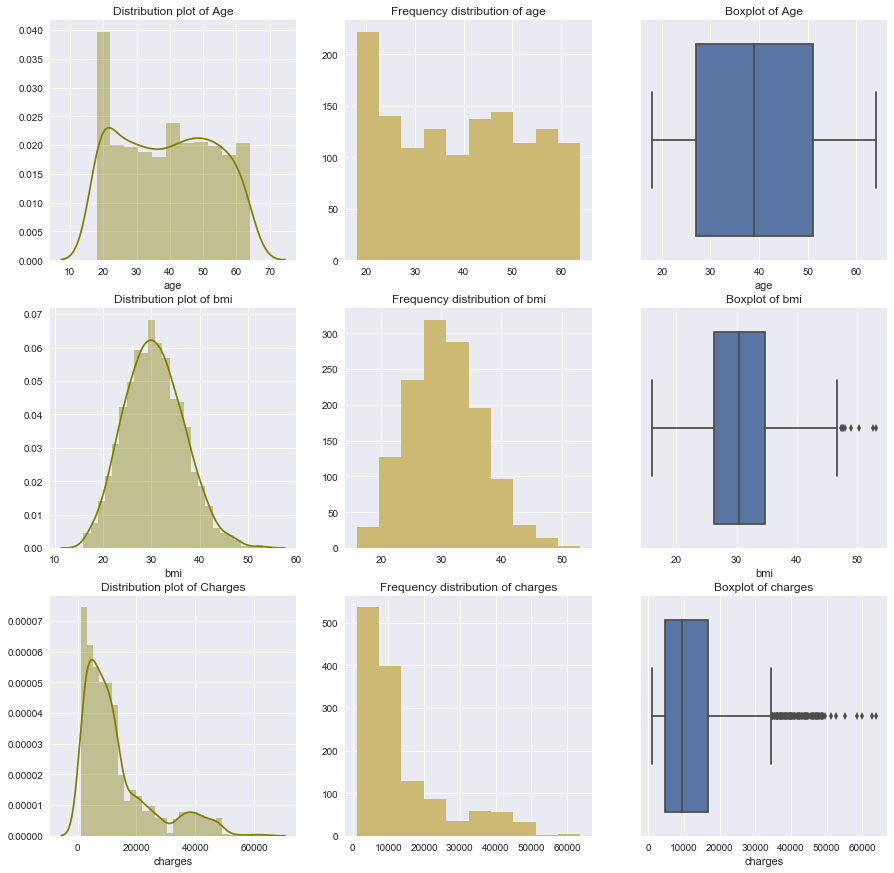

In [10]:
#Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
f,axes=plt.subplots(nrows=3,ncols=3,figsize=(15, 15))
sns.distplot(data['age'],ax=axes[0,0],norm_hist=True,color='olive').set_title("Distribution plot of Age");
axes[0,1].hist(data['age'],color='y')
axes[0,1].set_title('Frequency distribution of age')
sns.boxplot(data['age'],ax=axes[0,2]).set_title("Boxplot of Age");

sns.distplot(data['bmi'],ax=axes[1,0],norm_hist=True,color='olive').set_title("Distribution plot of bmi");
axes[1,1].hist(data['bmi'],color='y');
axes[1,1].set_title('Frequency distribution of bmi')
sns.boxplot(data['bmi'],ax=axes[1,2]).set_title("Boxplot of bmi");

sns.distplot(data['charges'],ax=axes[2,0],norm_hist=True,color='olive').set_title("Distribution plot of Charges");
axes[2,1].hist(data['charges'],color='y');
axes[2,1].set_title('Frequency distribution of charges')
sns.boxplot(data['charges'],ax=axes[2,2]).set_title("Boxplot of charges");

## f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [24]:
#Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [25]:
#Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
def skewness(data,x):
    val=data[x].skew(axis = 0,skipna = True)
    if val < -1.0 or val > 1.0:
        print('{} is highly skewed with skweness score : {}'.format(x,val))
    elif (val > -1 and val <-0.5) or (val < 1 and val >0.5):
        print('{} is moderatly skewed with skweness score : {}'.format(x,val))
    elif val > -0.5 or val < 0.5:
        print('{} is approximately symmetric with skweness score : {}'.format(x,val))
    return val

age=skewness(data,'age')
bmi=skewness(data,'bmi')
charges=skewness(data,'charges')


age is approximately symmetric with skweness score : 0.05567251565299186
bmi is approximately symmetric with skweness score : 0.2840471105987448
charges is highly skewed with skweness score : 1.5158796580240388


## g.Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges

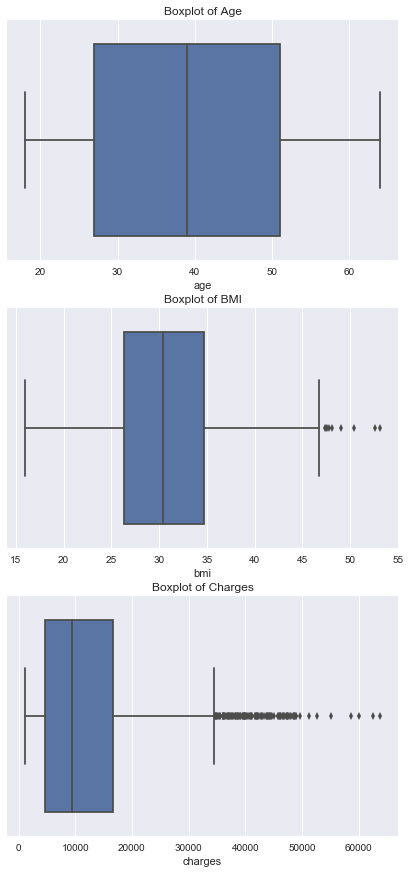

In [16]:
#Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges
#sns.pairplot(data[['age','bmi','charges']]);

#box plot for outlier detection
f,axes=plt.subplots(nrows=3,ncols=1,figsize=(7, 15))
sns.boxplot(data['age'],ax=axes[0]).set_title("Boxplot of Age");
sns.boxplot(data['bmi'],ax=axes[1]).set_title("Boxplot of BMI");
sns.boxplot(data['charges'],ax=axes[2]).set_title("Boxplot of Charges");

In [31]:
#Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges
## using Zscore
def zscore(data, x,threshold):
    val= stats.zscore(data[x])
    a=np.where(val >threshold)
    print(' Variable {} has {} outliers as per {} SD after normalization'.format(x,len(a[0]),threshold))
    return len(a[0])

age_z=zscore(data, 'age',3)
bmi_z=zscore(data, 'bmi',3)
charges_z=zscore(data, 'charges',3)
    

 Variable age has 0 outliers as per 3 SD after normalization
 Variable bmi has 4 outliers as per 3 SD after normalization
 Variable charges has 7 outliers as per 3 SD after normalization


### h. Distribution of categorical columns (include children) 

In [17]:
data['children']= data['children'].astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null object
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.2+ KB


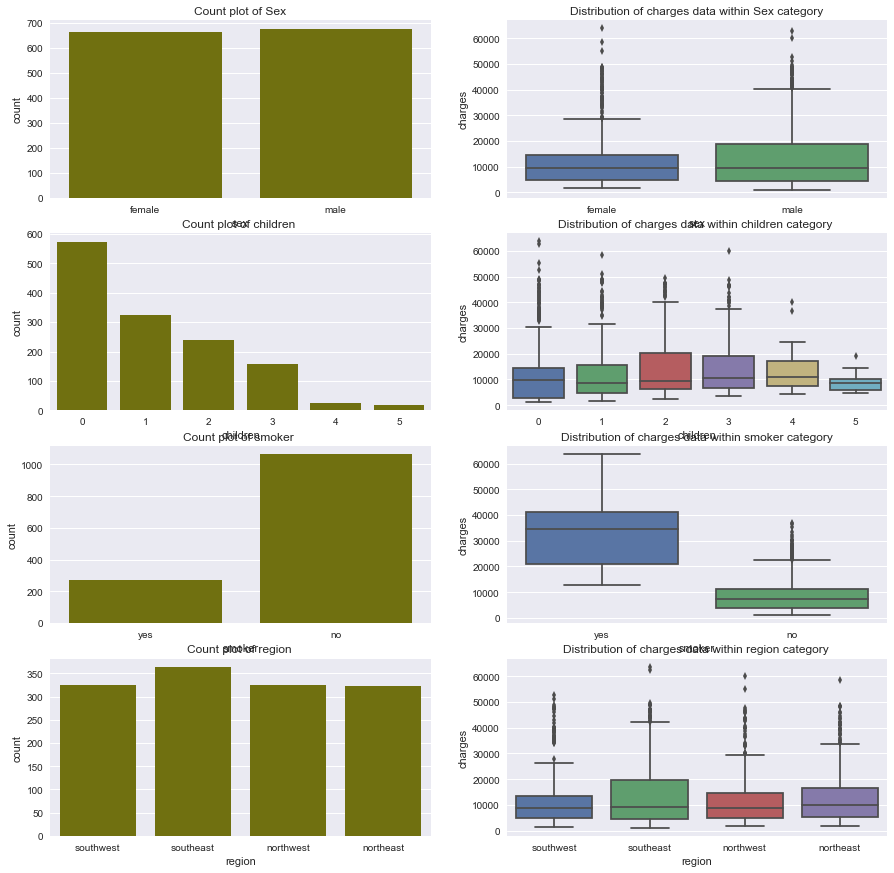

In [129]:
#Distribution of categorical columns (include children) (4 marks)
f,axes=plt.subplots(nrows=4,ncols=2,figsize=(15, 15))


sns.countplot(data['sex'],ax=axes[0,0],color='olive').set_title("Count plot of Sex");
sns.boxplot(data['sex'], data['charges'], ax=axes[0,1]).set_title("Distribution of charges data within Sex category");

sns.countplot(data['children'],ax=axes[1,0],color='olive').set_title("Count plot of children ");
sns.boxplot(data['children'], data['charges'], ax=axes[1,1]).set_title("Distribution of charges data within children category ");


sns.countplot(data['smoker'],ax=axes[2,0],color='olive').set_title("Count plot of smoker ");
sns.boxplot(data['smoker'], data['charges'], ax=axes[2,1]).set_title("Distribution of charges data within smoker category");

sns.countplot(data['region'],ax=axes[3,0],color='olive').set_title("Count plot of region ");
sns.boxplot(data['region'], data['charges'], ax=axes[3,1]).set_title("Distribution of charges data within region category ");


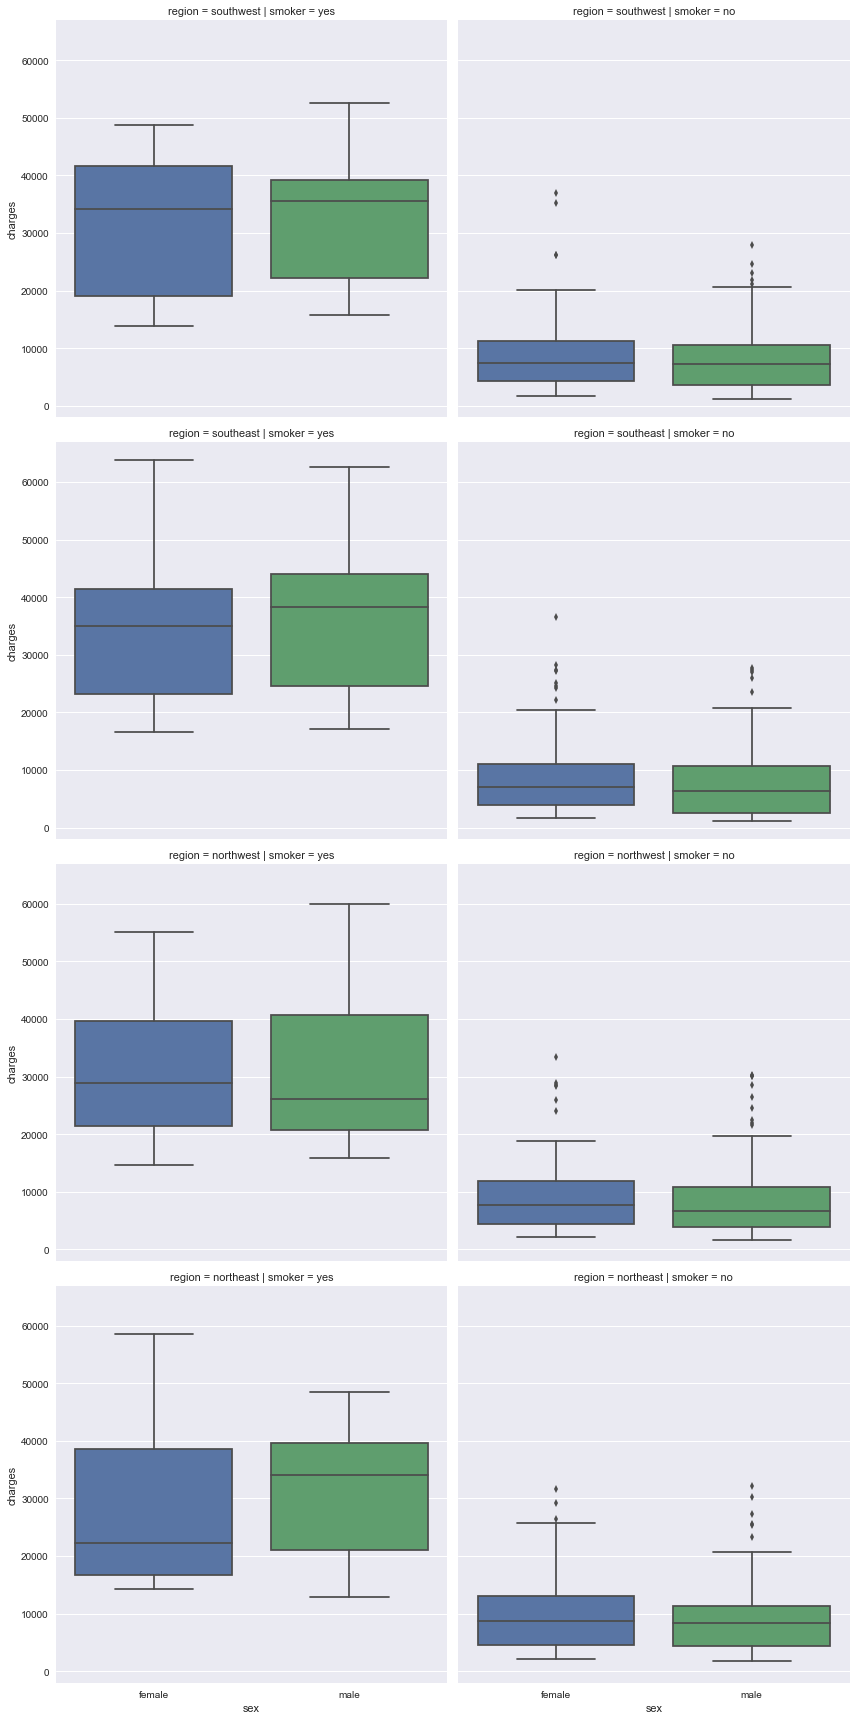

In [92]:
# distribution of categorical variables with respect to other categorical variables
sns.factorplot(x = "sex",
               y = "charges",
               #hue = 'children',
               row= 'region',
               col = 'smoker',
               data = data,
               kind = "box",
               size=6
              );

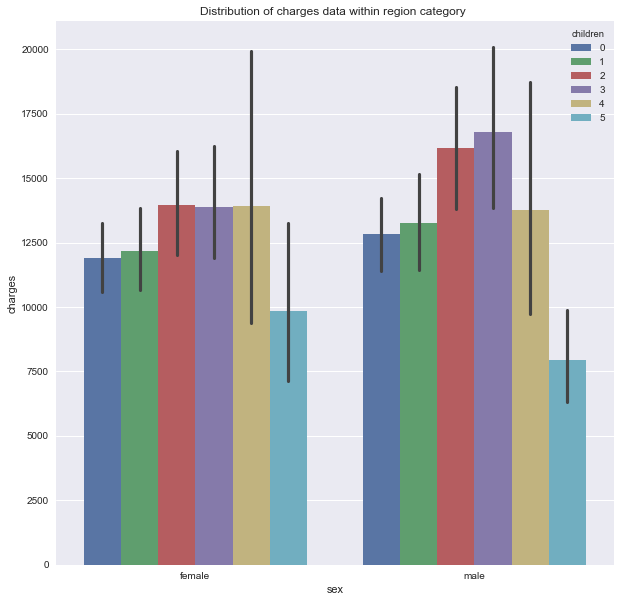

In [135]:
f=plt.subplots(figsize=(10, 10))
sns.barplot(data['sex'], data['charges'], hue=data['children']).set_title("Distribution of charges data within region category ");

## i. Pair plot that includes all the columns of the data frame

bmi is fairly symmetrical
age has a bimodal distribution
charges has positively skewed distribution


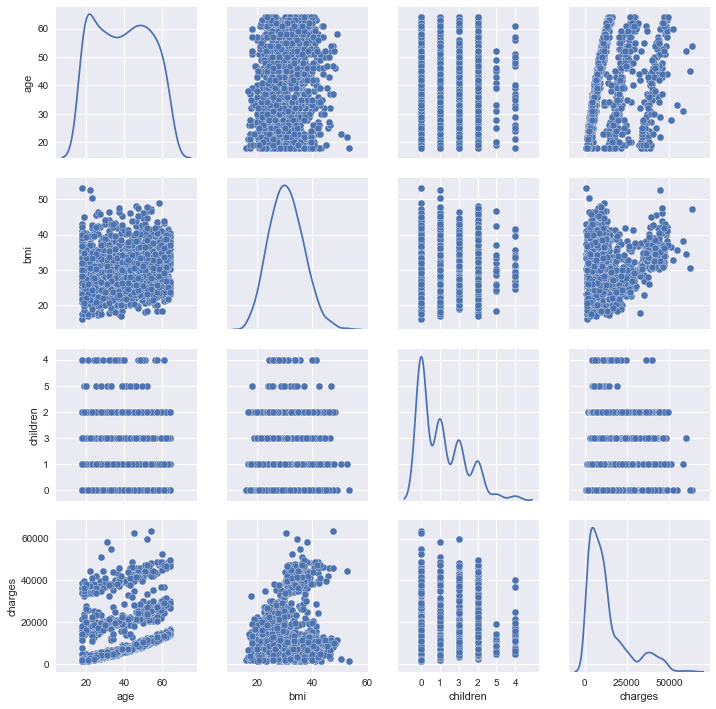

In [126]:
sns.pairplot(data,diag_kind="kde");
print("bmi is fairly symmetrical")
print("age has a bimodal distribution")
print("charges has positively skewed distribution")

## 4.a. Do charges of people who smoke differ significantly from the people who don't? 

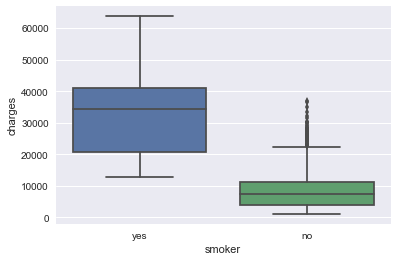

In [25]:
#step1: Lets visualize to see if there is any difference in charges for smorker and non-smoker
sns.boxplot(data['smoker'], data['charges'])

In [28]:
print('From box plot it looks like charges of people who somoke and who does not differs')
print("Let's check this using t-test" )

From box plot it looks like charges of people who somoke and who does not differs
Let's check this using t-test


In [109]:
data_smoker=data[data['smoker']=='yes']['charges']
data_nonsmoker=data[data['smoker']=='no']['charges']

(array([331., 260., 245., 141.,  20.,  22.,  19.,  16.,   6.,   4.]),
 array([ 1121.8739  ,  4700.747313,  8279.620726, 11858.494139,
        15437.367552, 19016.240965, 22595.114378, 26173.987791,
        29752.861204, 33331.734617, 36910.60803 ]),
 <a list of 10 Patch objects>)

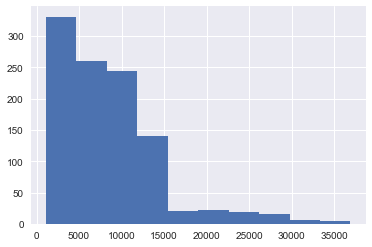

In [110]:
plt.hist(data_nonsmoker)

(array([35., 54., 28., 10., 47., 49., 36., 10.,  2.,  3.]),
 array([12829.4551  , 17923.552391, 23017.649682, 28111.746973,
        33205.844264, 38299.941555, 43394.038846, 48488.136137,
        53582.233428, 58676.330719, 63770.42801 ]),
 <a list of 10 Patch objects>)

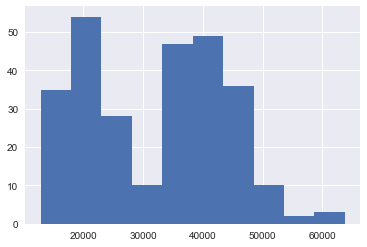

In [111]:
plt.hist(data_smoker)

In [33]:
print("HO: Average charges of smoker and non-smoker is same")
print("H1: Average charges of smoker is different than non-smoker")

HO: Average charges of smoker and non-smoker is same
H1: Average charges of smoker is different than non-smoker


In [112]:
# step1 : checking if variance of two samples is same of different

In [113]:
levene_statistic, p_value=stats.levene(data_smoker, data_nonsmoker, center='mean')
print(levene_statistic, p_value)
print ("leven test, p-value=", round(p_value,7))

print("test results")
if  p_value< 0.05:
    print(f'With a p-value of {round( p_value,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round( p_value,4)} the difference is not significant. aka |We fail to reject the null|')

print('Both groups does not have same variance')

403.26397655339804 1.3484459247996362e-78
leven test, p-value= 0.0
test results
With a p-value of 0.0 the difference is significant. aka |We reject the null|
Both groups does not have same variance


In [117]:
#checking for normality
shapiro_statistic, p_value=stats.shapiro(data_nonsmoker)
print("test results")
if  p_value< 0.05:
    print(f'With a p-value of {round( p_value,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round( p_value,4)} the difference is not significant. aka |We fail to reject the null|')
print('sample of nonsmoker is not normally distributed')

test results
With a p-value of 0.0 the difference is significant. aka |We reject the null|
sample of nonsmoker is not normally distributed


In [118]:
shapiro_statistic, p_value=stats.shapiro(data_smoker)
print("test results")
if  p_value< 0.05:
    print(f'With a p-value of {round( p_value,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round( p_value,4)} the difference is not significant. aka |We fail to reject the null|')
print('sample of smoker is not normally distributed')

test results
With a p-value of 0.0 the difference is significant. aka |We reject the null|
sample of smoker is not normally distributed


## Both samples of charges within smokers group does not have equal variance nor it is normally distributed.
## So carrying out non-parametric test too

In [119]:
# two-sample t-test
# null hypothesis: the two groups have the same mean
# this test assumes the two groups have the same variance...
t_statistic, p_value = ttest_ind(data_smoker, data_nonsmoker,equal_var=False)
print(t_statistic, p_value)
print ("two-sample t-test p-value=", round(p_value,7))

print("test results")
if  p_value< 0.05:
    print(f'With a p-value of {round( p_value,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round( p_value,4)} the difference is not significant. aka |We fail to reject the null|')

print("Charges of people who smoke differ significantly from the people who don't")

32.751887766341824 5.88946444671698e-103
two-sample t-test p-value= 0.0
test results
With a p-value of 0.0 the difference is significant. aka |We reject the null|
charges of people who smoke differ significantly from the people who don't


## Both samples of charges within smokers group does not have equal variance nor it is normally distributed so carring out non-oarametric test too

In [122]:
u_statistic, p_value = stats.mannwhitneyu(data_smoker, data_nonsmoker)
print(u_statistic, p_value)
print ("two-sample t-test p-value=", round(p_value,7))
print("test results")
if  p_value< 0.05:
    print(f'With a p-value of {round( p_value,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round( p_value,4)} the difference is not significant. aka |We fail to reject the null|')

print("Charges of people who smoke differ significantly from the people who don't")

7403.0 2.6351167222517853e-130
two-sample t-test p-value= 0.0
test results
With a p-value of 0.0 the difference is significant. aka |We reject the null|
Charges of people who smoke differ significantly from the people who don't


## 4.b. Does bmi of males differ significantly from that of females

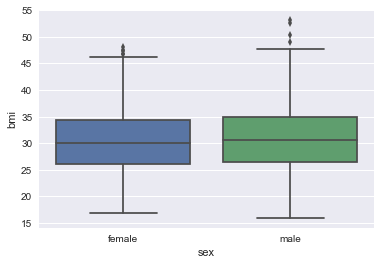

In [91]:
sns.boxplot(data['sex'], data['bmi'])


In [46]:
print('From box plot it looks like bmi of male and female does not differ')
print("Let's check this using t-test" )

From box plot it looks like bmi of male and female does not differ
Let's check this using t-test


In [51]:
data_female_bmi=data[data['sex']=='female']['bmi']
data_mal_bmi=data[data['sex']=='male']['bmi']

In [48]:
print("HO: Average BMI of male and female is not significantly different")
print("H1: Average BMI of male and female is significantly different")

HO: Average BMI of male and female is not significantly different
H1: Average BMI of male and female is significantly different


In [53]:
t_statistic, p_value = ttest_ind(data_female_bmi, data_mal_bmi)
print(t_statistic, p_value)
print ("two-sample t-test p-value=", round(p_value,7))

print("test results")
if  p_value< 0.05:
    print(f'With a p-value of {round( p_value,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round( p_value,4)} the difference is not significant. aka |We fail to reject the null|')

print('The average bmi of male and female does not differ singnificantly')

-1.696752635752224 0.08997637178984932
two-sample t-test p-value= 0.0899764
test results
With a p-value of 0.09 the difference is not significant. aka |We fail to reject the null|
The average bmi of male and female does not differ singnificantly


## 4.c.Is the proportion of smokers significantly different in different genders?

In [64]:
female_smokers = data[data['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = data[data['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = data.sex.value_counts()[1] # number of females in the data
n_males = data.sex.value_counts()[0] #number of males in the data
print([female_smokers, male_smokers] , [n_females, n_males])

[115, 159] [662, 676]


In [87]:
print("HO: The proportion of smokers is not significantly different in different genders")
print("H1: The proportion of smokers significantly different in different genders")

HO: The proportion of smokers is not significantly different in different genders
H1: The proportion of smokers significantly different in different genders


In [145]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')
    
print("Proportions of smokers within gender group differs significantly")

With a p-value of 0.0053 the difference is significant. aka |We reject the null|
Proportions of smokers within gender group differs significantly


## 4.d.Is the distribution of bmi across women with no children, one child and two children, the same?

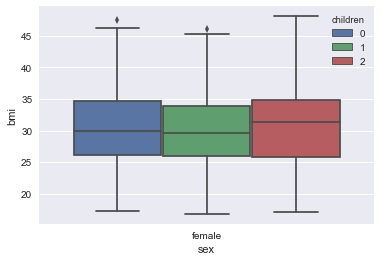

In [89]:
data_female=data[(data['sex']=='female')]
data_female_1=data_female[(data_female['children'].isin(['0','1','2']) )]

sns.boxplot(data_female_1['sex'], data_female_1['bmi'], hue=data_female_1['children']);

In [76]:
print("HO: Average BMI bmi across women with no children, one child and two children, is not siginificantly different")
print("H1: Average BMI bmi across women with no children, one child and two children, is siginificantly different")

HO: Average BMI bmi across women with no children, one child and two children, is not siginificantly different
H1: Average BMI bmi across women with no children, one child and two children, is siginificantly different


In [77]:
mod = ols('bmi ~ children', data = data_female_1).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


In [80]:
pval=0.715858
if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')
    
print("The distribution of bmi across women with no children, one child and two children is not significantly different")

With a p-value of 0.7159 the difference is not significant. aka |We fail to reject the null|
The distribution of bmi across women with no children, one child and two children is not significantly different


In [75]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(data_female_1['bmi'], data_female_1['children']))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1    -0.3089  -1.7186 1.1008 False 
  0      2     0.2883  -1.2636 1.8402 False 
  1      2     0.5971  -1.1323 2.3265 False 
--------------------------------------------


In [83]:
print('Pairwise Tukey-krammer HSD test too fail to reject null hypothesis')
print("The distribution of bmi across women with no children, one child and two children is not significantly different")

Pairwise Tukey-krammer HSD test too fail to reject null hypothesis
The distribution of bmi across women with no children, one child and two children is not significantly different


# ****************** Summary Report *********************************

1. Insurance data file has 1338 observations as 7 variables
2. Input variable details :
   a.age: age of primary beneficiary varies from 18 years to 64 years with average age of 34 years
   b.sex: insurance contractor gender, female, male. Data is equally distributed or avaiable for both the genders.
          Charges have more variation within Male groups, while charges for males are higher than female
          There is no significat difference between avergae BMI withing both groups
          Both male and female in this data has 0 to 5 childrens
   c.bmi: average bmi in this group is 30.66
   d.children:On an average 1 child is cover under insurance only for 25% data sample has more than 3 childrens covered under insurance
   e. Smoker:data has 20% of smokers, visually charges for smokers looks higher than non-smoker
   f.region:Data is equally distributed across all region. shows higher charge distribution within southeast region
   g:Charges: On an average charges are 13270.4. Data for charges looks positively skwed
   
   
# Inferences:
### 1.Charges for people who smoke differ significantly from the people who don't.
### 2.Proportions of smokers within gender group differs significantly
### 3.The average bmi of male and female does not differ singnificantly
### 4. The distribution of bmi across women with no children, one child and two children is not significantly different
